# Comparación de eficacia
### Modelos de Regresión

### Librerías necesarias

In [44]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib.colors import Normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB

### Generación de datos a usar

In [45]:
train_data=pd.read_csv("../train.csv", encoding="latin1")
columnas_aUsar = ['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath',
                  "TotalBsmtSF", "GrLivArea", "GarageCars", 'WoodDeckSF',
                  "FullBath"]
_train = train_data[columnas_aUsar]

y = train_data["SalePrice"]
X = _train

print("Columnas usadas (" + str(len(_train.columns)) + ") :\n"+ str(_train.columns))

Columnas usadas (9) :
Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath',
       'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'WoodDeckSF', 'FullBath'],
      dtype='object')


In [46]:
# Separación de datos (entrenamiento y pruebas)
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 9)
(438, 9)
(1021,)
(438,)


In [47]:
#Normalización de datos
scalerB = StandardScaler()  # Crear el escalador

X_train_scaled = scalerB.fit_transform(X_train)
X_test_scaled = scalerB.transform(X_test)

### Creación de modelos
Copy - paste de los modelos creados anteriormente

#### Modelo de regresión lineal

In [48]:
price = y_train.values.reshape(-1,1)
price_t = y_test.values.reshape(-1,1)

modeloRL = LinearRegression()

start = time.time()
modeloRL.fit(X_train_scaled, price)
tiempo_entrenamiento_rl = time.time() - start

y_predRL = modeloRL.predict(X_test_scaled)

#### Modelo de árbol de decisión

In [49]:
# Entrenar modelo
modeloDT = DecisionTreeRegressor(max_depth=7)

start = time.time()
modeloDT.fit(X_train_scaled, y_train)
tiempo_entrenamiento_dt = time.time() - start

# Predicciones
y_predDT = modeloDT.predict(X_test_scaled)

#### Modelo Random Forest

In [50]:
# Crear y entrenar el modelo
modeloRF = RandomForestRegressor(n_estimators=1000, max_depth=7)

start = time.time()
modeloRF.fit(X_train_scaled, y_train)
tiempo_entrenamiento_rf = time.time() - start

# Hacer predicciones
y_predRF = modeloRF.predict(X_test_scaled)

#### Modelo Naive Bayes

In [51]:
# Crear y entrenar el modelo
modeloNB = GaussianNB(var_smoothing=1e-06)

start = time.time()
modeloNB.fit(X_train_scaled,y_train)
tiempo_entrenamiento_nb = time.time() - start

# Hacer predicciones
y_predNB = modeloNB.predict(X_test_scaled)

#### Modelo KNN

In [52]:
# Crear y entrenar el modelo
modeloKNN = KNeighborsRegressor()

start = time.time()
modeloKNN.fit(X_train_scaled,y_train)
tiempo_entrenamiento_knn = time.time() - start

# Hacer predicciones
y_predKNN = modeloKNN.predict(X_test_scaled)

### Comparación y análisis

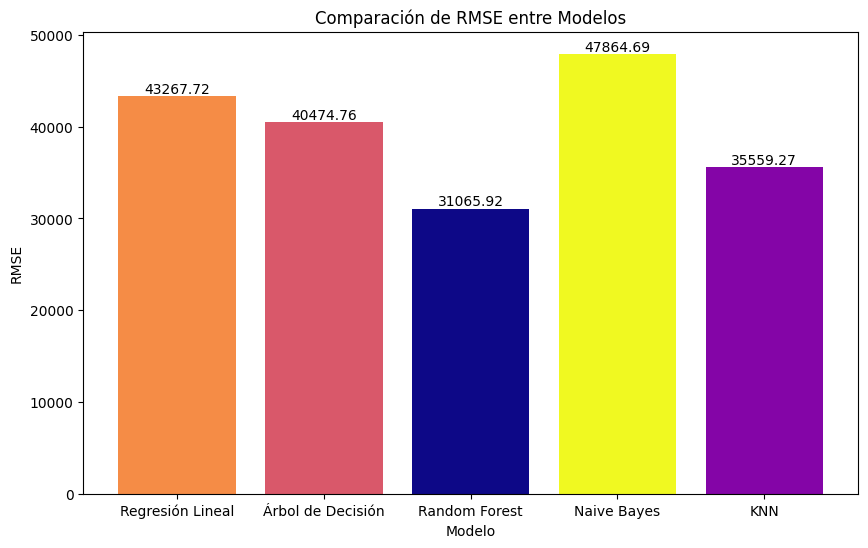

In [53]:
# Calcular RMSE para cada modelo
modelos = ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest', 'Naive Bayes', 'KNN']
rmse_values = [
    root_mean_squared_error(y_test, y_predRL),
    root_mean_squared_error(y_test, y_predDT),
    root_mean_squared_error(y_test, y_predRF),
    root_mean_squared_error(y_test, y_predNB),
    root_mean_squared_error(y_test, y_predKNN),
]

# Normalizar los valores
norm = Normalize(vmin=min(rmse_values), vmax=max(rmse_values))

cmap = colormaps['plasma']

# Asignar colores a las barras
colors = [cmap(norm(value)) for value in rmse_values]

plt.figure(figsize=(10, 6))
bars = plt.bar(modelos, rmse_values, color=colors)
plt.title('Comparación de RMSE entre Modelos')
plt.xlabel('Modelo')
plt.ylabel('RMSE')

# Agregar etiquetas a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


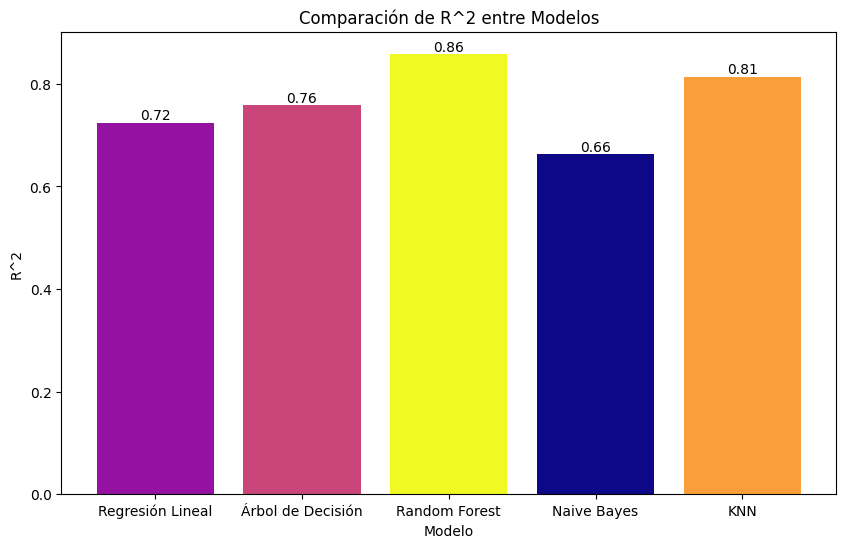

In [54]:
r2_values = [
    r2_score(y_test, y_predRL),
    r2_score(y_test, y_predDT),
    r2_score(y_test, y_predRF),
    r2_score(y_test, y_predNB),
    r2_score(y_test, y_predKNN),
]

# Normalizar los valores de R²
norm = Normalize(vmin=min(r2_values), vmax=max(r2_values))

cmap = colormaps['plasma']

# Asignar colores a las barras
colors = [cmap(norm(value)) for value in r2_values]

plt.figure(figsize=(10, 6))
bars = plt.bar(modelos, r2_values, color=colors)
plt.title('Comparación de R^2 entre Modelos')
plt.xlabel('Modelo')
plt.ylabel('R^2')

# Agregar etiquetas a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    
plt.show()


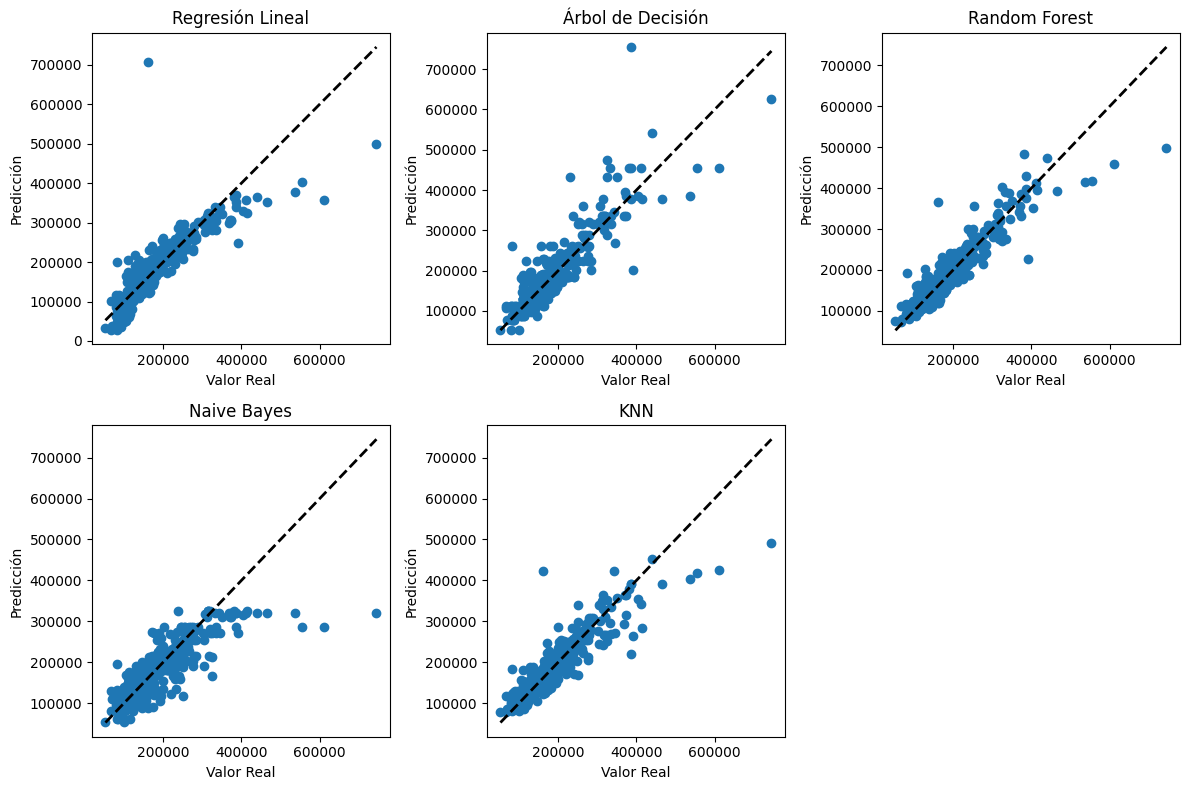

In [55]:
plt.figure(figsize=(12, 8))

# Para cada modelo
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_predRL, label='Regresión Lineal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Regresión Lineal')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')

plt.subplot(2, 3, 2)
plt.scatter(y_test, y_predDT, label='Árbol de Decisión')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Árbol de Decisión')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')

plt.subplot(2, 3, 3)
plt.scatter(y_test, y_predRF, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Random Forest')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')

plt.subplot(2, 3, 4)
plt.scatter(y_test, y_predNB, label='Naive Bayes')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Naive Bayes')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')

plt.subplot(2, 3, 5)
plt.scatter(y_test, y_predKNN, label='KNN')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('KNN')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')

plt.tight_layout()
plt.show()


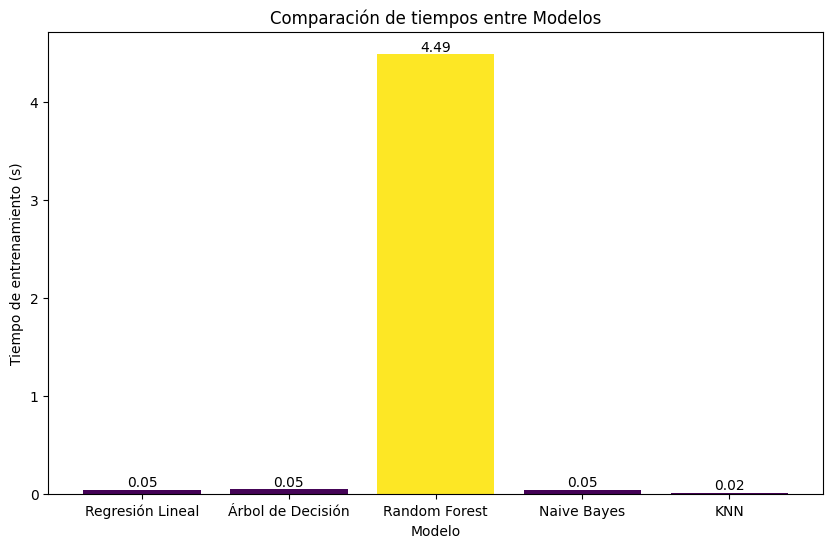

In [56]:
# Comparar tiempos de ejecución
time_values = [
    tiempo_entrenamiento_rl,
    tiempo_entrenamiento_dt,
    tiempo_entrenamiento_rf,
    tiempo_entrenamiento_nb,
    tiempo_entrenamiento_knn
]

# Normalizar los valores
norm = Normalize(vmin=min(time_values), vmax=max(time_values))

cmap = colormaps['viridis']

# Asignar colores a las barras
colors = [cmap(norm(value)) for value in time_values]

plt.figure(figsize=(10, 6))
bars = plt.bar(modelos, time_values, color=colors)
plt.title('Comparación de tiempos entre Modelos')
plt.xlabel('Modelo')
plt.ylabel('Tiempo de entrenamiento (s)')

# Agregar etiquetas a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [59]:
print("time: " + str(time_values))
print("r2: " + str(r2_values))
print("rmse: " + str(rmse_values))

time: [0.04810833930969238, 0.05426836013793945, 4.486489295959473, 0.04742765426635742, 0.015924930572509766]
r2: [0.7242453896841182, 0.7586966374943748, 0.8578446623624791, 0.6625377515608756, 0.8137482181350053]
rmse: [43267.72110061528, 40474.763281905674, 31065.919759574885, 47864.687571333525, 35559.27098445032]
